In [36]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
#Loading data
data = pd.read_csv('police_department_data.csv')
data = data.dropna(axis=0)
data['crime_date']=pd.to_datetime(data['crime_date'])
data.head(10)

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"
5,160002869,ASSAULT,BATTERY,2016-01-01 21:35:00,NORTHERN,NONE,1700 Block of BUSH ST,16000286904134,"(37.788018555829, -122.426077177375)"
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,2016-01-02 00:04:00,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,16000313026150,"(37.7808789360214, -122.405721454567)"
7,160003259,NON-CRIMINAL,FIRE REPORT,2016-01-02 01:02:00,TENDERLOIN,NONE,200 Block of EDDY ST,16000325968000,"(37.7839805592634, -122.411778295992)"
8,160003970,WARRANTS,WARRANT ARREST,2016-01-02 12:21:00,SOUTHERN,"ARREST, BOOKED",4TH ST / BERRY ST,16000397063010,"(37.7757876218293, -122.393357241451)"
9,160003641,MISSING PERSON,FOUND PERSON,2016-01-01 10:06:00,BAYVIEW,NONE,100 Block of CAMERON WY,16000364175000,"(37.7209669615499, -122.387181635995)"


Text(0.5, 1.0, 'The overall crime in category')

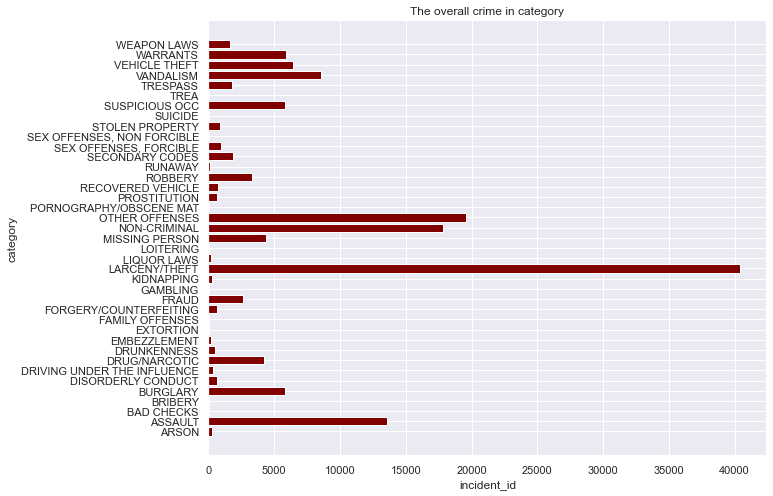

In [38]:
#Incident ID vs Category
groupCategory=data.groupby("category",as_index=False)
plt.figure(figsize=(10,8))
plt.barh(groupCategory.count()['category'],groupCategory.count()['incident_id'],color="maroon")
plt.xlabel("incident_id")
plt.ylabel("category")
plt.title("The overall crime in category")

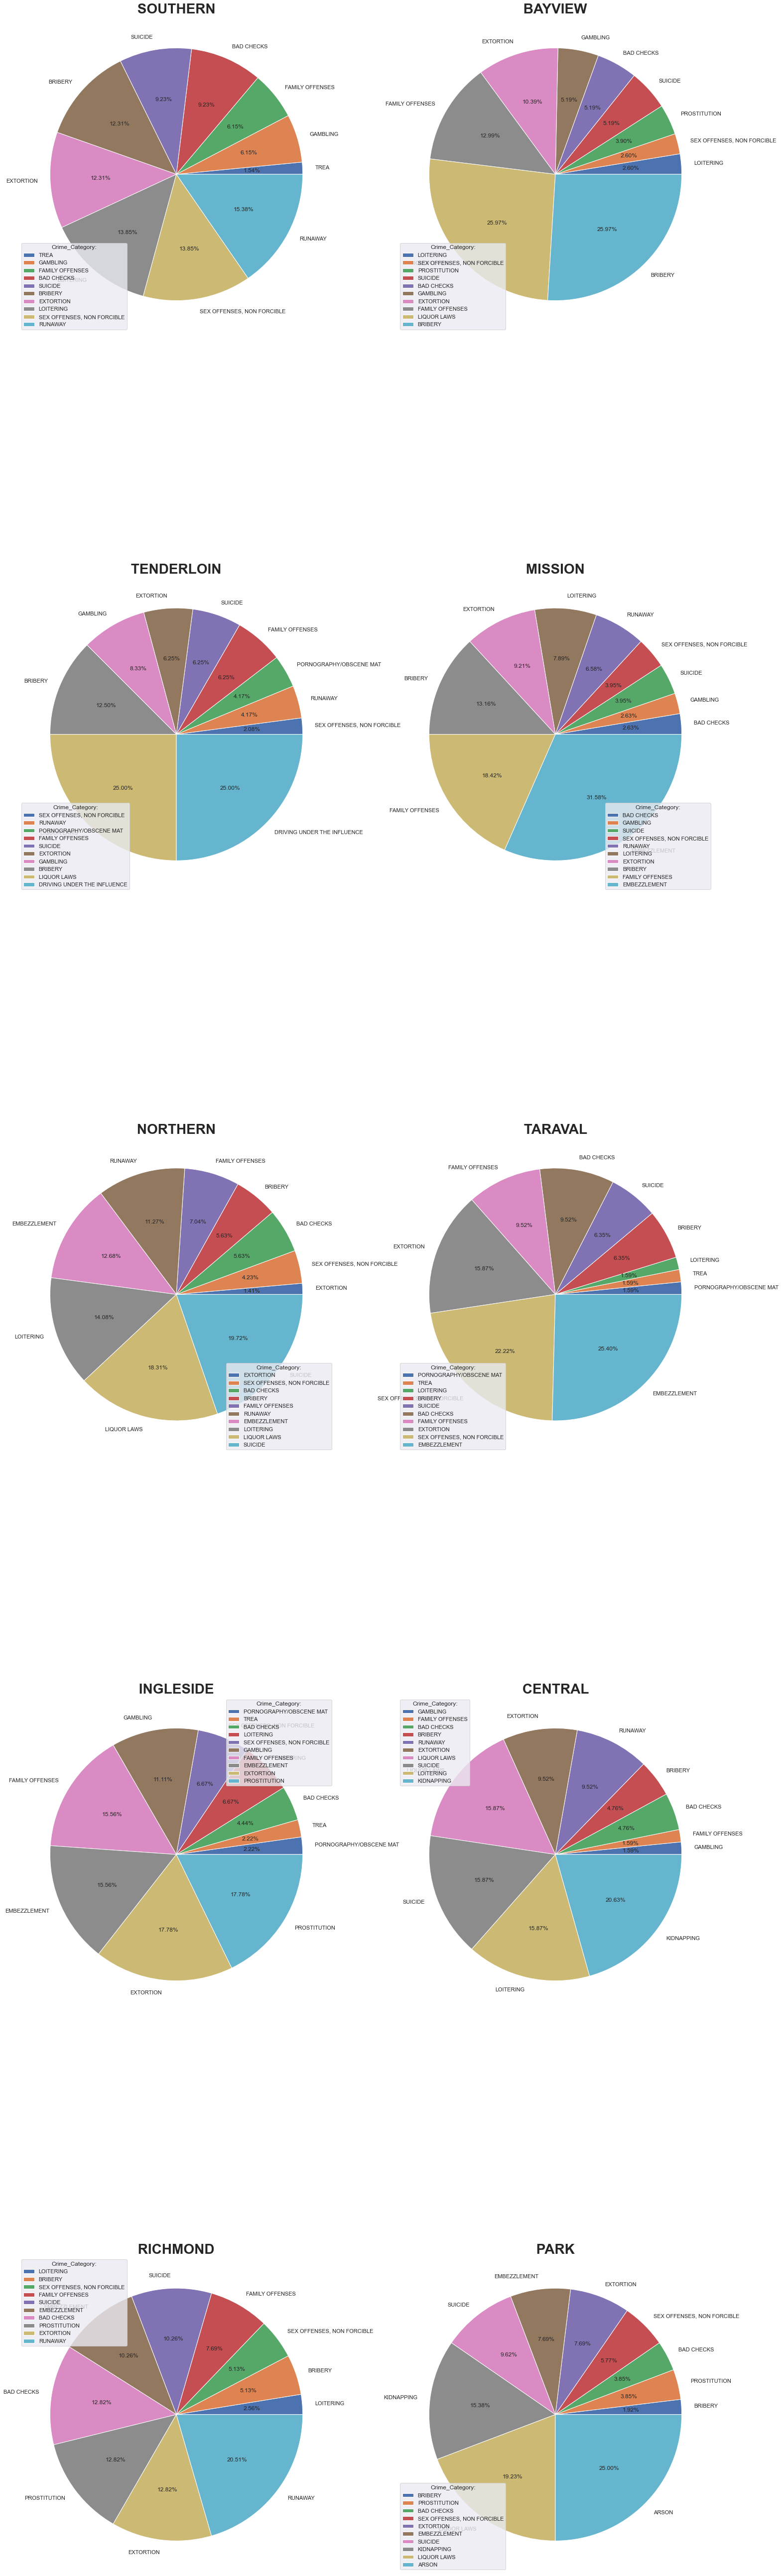

In [39]:
#District vs incident catgory
groupDepartCategory=data.groupby(['department_district','category'],as_index=False).count()
groupDepartCategory=groupDepartCategory[['department_district','category','incident_id']]
def drawPlotCat(groupDepartCategory,plt,department_district,no_of_Category):
    result=groupDepartCategory[groupDepartCategory['department_district']==department_district].sort_values(by='incident_id')[:no_of_Category]
    plt.pie(result['incident_id'],labels=result['category'], autopct= '%0.2f%%')
    plt.legend(title = "Crime_Category:")
fig, axs = plt.subplots(5,2)
fig.set_figheight(100)
fig.set_figwidth(25)
districtName=data['department_district'].unique()
index=0
top_number=10
for row in range(5):
    for col in range(2):
        drawPlotCat(groupDepartCategory,axs[row,col],districtName[index],top_number)
        axs[row,col].set_title(' %s '% districtName[index],fontweight="bold",size=28)
        index +=1

In [40]:
#Checking unique Values
data['resolution'].unique()

array(['ARREST, BOOKED', 'NONE', 'JUVENILE BOOKED', 'ARREST, CITED',
       'UNFOUNDED', 'JUVENILE DIVERTED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'EXCEPTIONAL CLEARANCE',
       'LOCATED', 'PSYCHOPATHIC CASE', 'COMPLAINANT REFUSES TO PROSECUTE',
       'NOT PROSECUTED', 'PROSECUTED BY OUTSIDE AGENCY', 'JUVENILE CITED'],
      dtype=object)

In [41]:
#Null values
data['resolution'].isnull().count()

150499

In [43]:
#Creating month columns
# import calendar
# data['month']=data['crime_date'].dt.month.apply(lambda x: calendar.month_abbr[x])

Text(0.5, 1.0, 'The Monthly Crime count ')

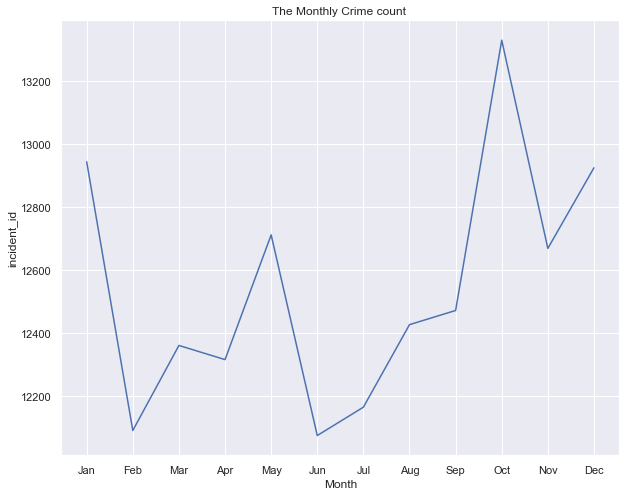

In [44]:
#Months vs Crime category
import calendar
data['month']=data['crime_date'].dt.month
monthList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
grpMonthID=data.groupby('month',as_index=False).count()
grpMonthID=grpMonthID[['month','incident_id']]
plt.figure(figsize=(10,8))
plt.xlabel("Month")
plt.ylabel("incident_id")
plt.legend
plt.plot(grpMonthID['month'],grpMonthID['incident_id'])
plt.xticks([i for i in range(1,13)],monthList)
plt.title("The Monthly Crime count ")

Text(0.5, 1.0, 'The hour-wise Crime count ')

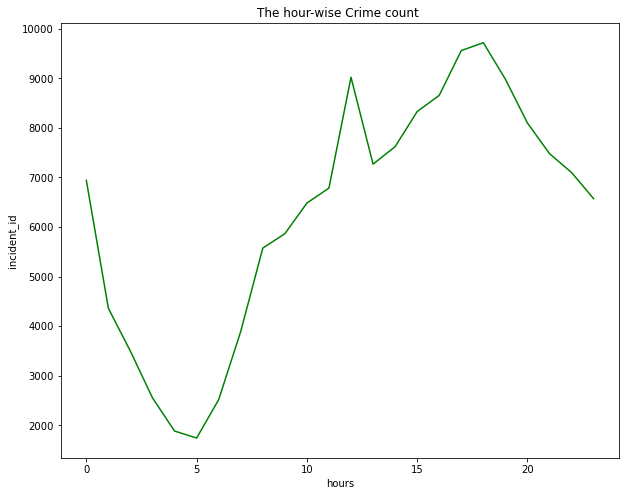

In [11]:
#hours vs incident id
data['hours']=data['crime_date'].dt.hour
hoursGroupID=data.groupby('hours',as_index=False).count()[['hours','incident_id']]
plt.figure(figsize=(10,8))
plt.xlabel("hours")
plt.ylabel("incident_id")
plt.plot(hoursGroupID['hours'],hoursGroupID['incident_id'],color = "green")
plt.title("The hour-wise Crime count ")


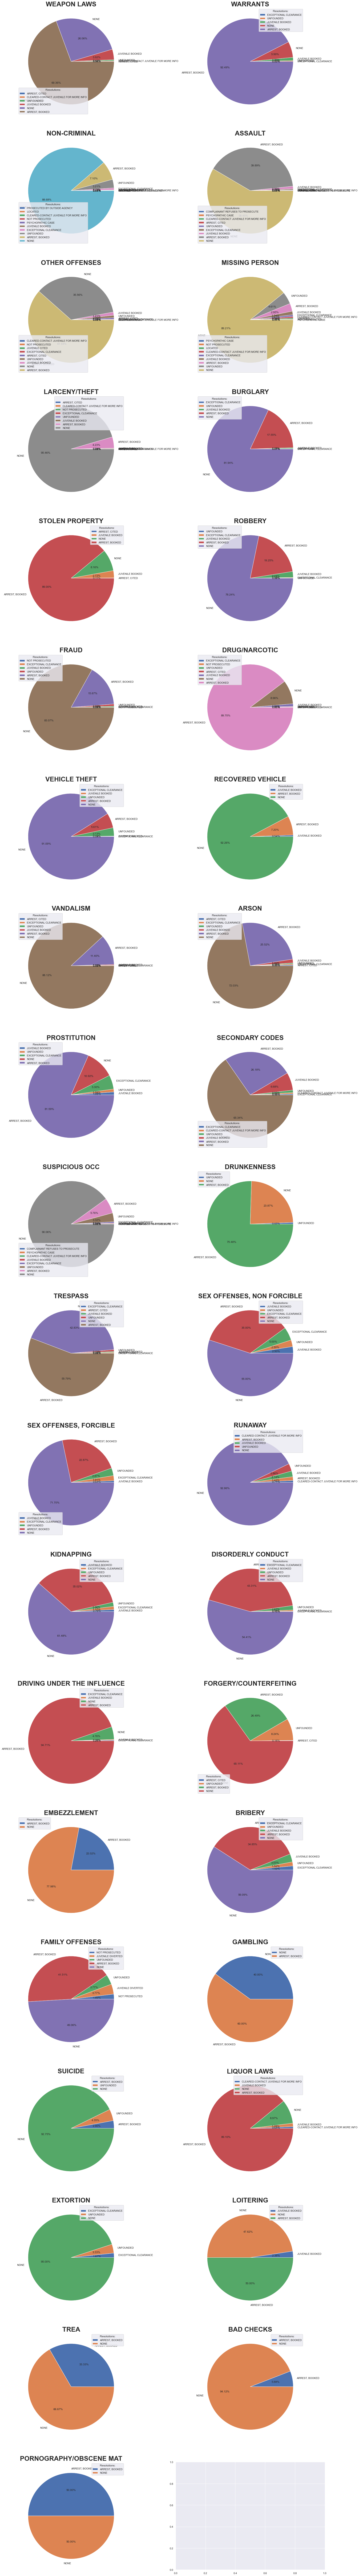

In [45]:
# Crime category vs resolution
groupCategoryResolution=data.groupby(['category','resolution'],as_index=False).count()
groupCategoryResolution=groupCategoryResolution[['category','resolution','incident_id']]
def drawPlotCatRes(grpDeptCat,plt,cat):
    result=grpDeptCat[grpDeptCat['category']==cat].sort_values(by='incident_id')
    plt.pie(result['incident_id'],labels=result['resolution'], autopct='%0.2f%%')
    plt.legend(title = "Resolutions:")
fig, axs = plt.subplots(20,2)
fig.set_figheight(200)
fig.set_figwidth(25)
categoryName=data['category'].unique()
index=0
top_number=5
for row in range(20):
    for col in range(2):
        if (index>= len(categoryName)):
            continue
        drawPlotCatRes(groupCategoryResolution,axs[row,col],categoryName[index])
        axs[row,col].set_title(' %s '% categoryName[index],fontweight="bold",size=28)
        index +=1

In [46]:
#Creating location data
data['location']=data['location'].str.replace(r"\(|\)","")
data['latitude']=data["location"].str.split(",").apply(lambda x:x[0]).astype('float32')
data["longitude"]=data["location"].str.split(",").apply(lambda x:x[1]).astype('float32')

C:\Users\admin\AppData\Local\Temp\ipykernel_21744\1830702890.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['location']=data['location'].str.replace(r"\(|\)","")


In [47]:
location=data[["longitude","latitude"]]

In [48]:
# plt.figure(figsize=(20,12))
# plt.scatter(location["longitude"],location["latitude"])

In [49]:
location['category']=data['category']

C:\Users\admin\AppData\Local\Temp\ipykernel_21744\2949657642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location['category']=data['category']


C:\Users\admin\AppData\Local\Temp\ipykernel_21744\1318411374.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = ax.figure.colorbar(im,


<Figure size 1440x864 with 0 Axes>

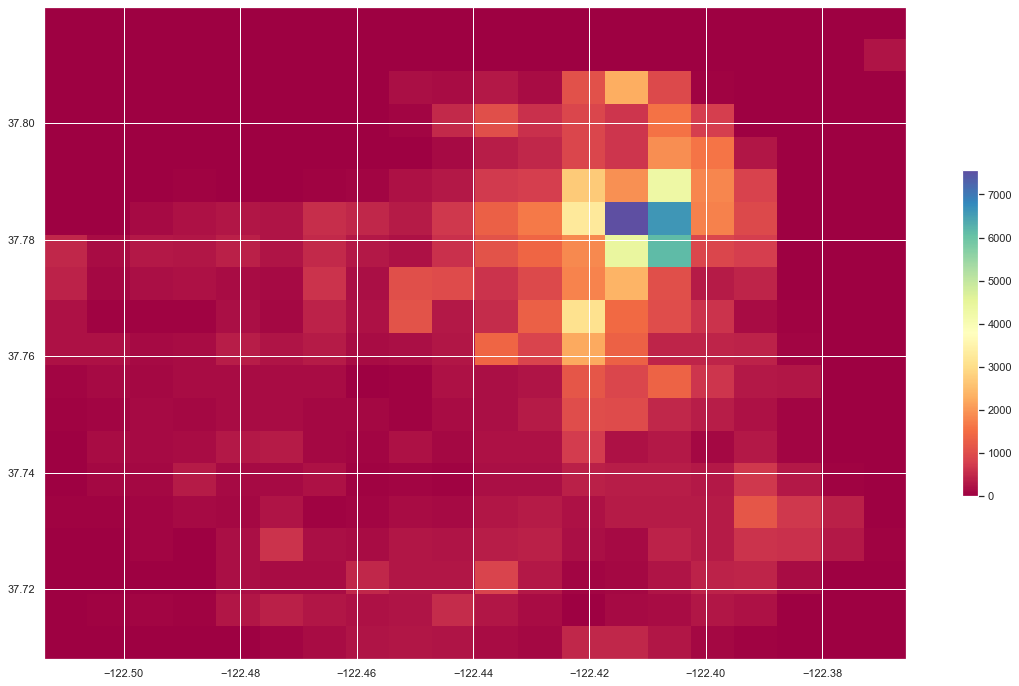

In [52]:
#heatmap
import numpy as np
plt.figure(figsize=(20,12))

heatmap, xedges, yedges = np.histogram2d(location["longitude"], location["latitude"], bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig, ax = plt.subplots( figsize=(20,12))
im = ax.imshow(heatmap.T, extent=extent,cmap="Spectral",origin="lower")
cbar = ax.figure.colorbar(im,
                          ax=ax,
                          shrink=0.5 )

plt.show()


In [53]:
grpMonthID2=data.groupby(['month','department_district'],as_index=False).count()[['month','incident_id','department_district']]

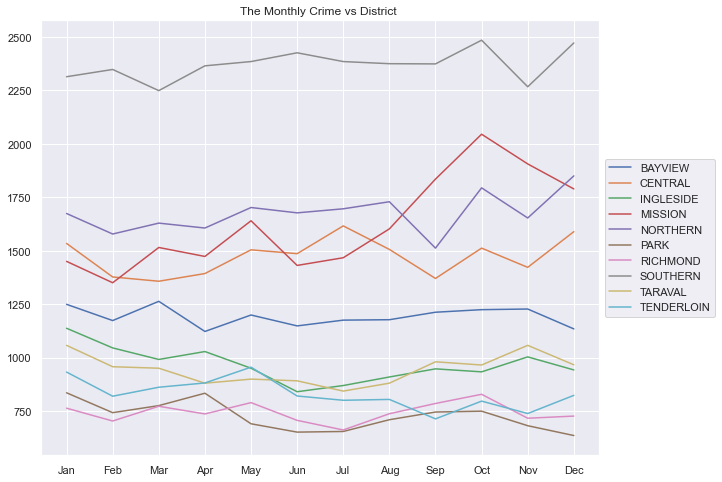

In [54]:
udist = grpMonthID2['department_district'].unique().tolist()
plt.figure(figsize=(10,8))

for dist in udist:
    select=grpMonthID2.loc[grpMonthID2['department_district']==dist]
    plt.plot(select['month'],select['incident_id'],label=dist)
    monthList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks([i for i in range(1,13)],monthList)
plt.title("The Monthly Crime vs District ")
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))